In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, f_oneway
# import chart_studio.plotly as py
# import plotly.tools as tls
# from plotly.graph_objs import *


from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models import Tabs, Panel, HoverTool
from bokeh.transform import factor_cmap
import numpy as np
# init bokeh

# from bokeh.application import Application
# from bokeh.application.handlers import FunctionHandler
    
    
output_notebook()

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

Loading BokehJS ...

In [2]:
# data = [[1,2,3,1,2,3],[4,5,6,6,5,4]]

# testlayout = Layout(
#     title='haha yes you are titling my graph jonathan',
#     xaxis=py.graph_objs.layout.XAxis(),
#     yaxis=py.graph_objs.layout.YAxis()
# )
# testfig=Figure(data=data,layout=testlayout)

# py.iplot(testfig)

In [3]:
df = pd.read_csv("gapminder_clean.csv")
df.columns

Index(['Unnamed: 0', 'Country Name', 'Year',
       'Agriculture, value added (% of GDP)',
       'CO2 emissions (metric tons per capita)',
       'Domestic credit provided by financial sector (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'Fertility rate, total (births per woman)', 'GDP growth (annual %)',
       'Imports of goods and services (% of GDP)',
       'Industry, value added (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Life expectancy at birth, total (years)',
       'Population density (people per sq. km of land area)',
       'Services, etc., value added (% of GDP)', 'pop', 'continent',
       'gdpPercap'],
      dtype='object')

<Axes: xlabel='CO2 emissions (metric tons per capita)', ylabel='gdpPercap'>

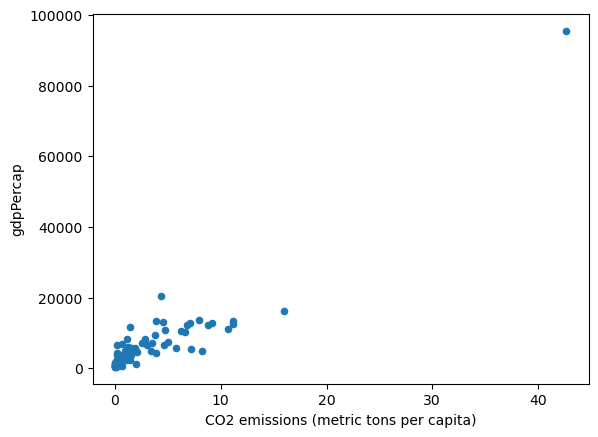

In [4]:
df[df.Year==1962].plot('CO2 emissions (metric tons per capita)','gdpPercap','scatter')

In [5]:
# correlation and associate p value of above metrics (1962)
df_1962 = df[df.Year==1962]
corr62 = df_1962['CO2 emissions (metric tons per capita)'].corr(df_1962['gdpPercap'],method='pearson',)
pval62 = df_1962['CO2 emissions (metric tons per capita)'].corr(df_1962['gdpPercap'],method=pearsonr_pval)

print(f'{corr62},{pval62}')

0.9260816725019451,1.1286792210037025e-46


In [6]:
corrAll = df['CO2 emissions (metric tons per capita)'].corr(df['gdpPercap'],method='pearson',)
pvalAll = df['CO2 emissions (metric tons per capita)'].corr(df['gdpPercap'],method=pearsonr_pval)

print(f'{corrAll},{pvalAll}')

0.8132918615315475,2.9309176165311536e-280


In [7]:
for annum in df['Year'].unique():
    df_annum = df[df.Year==annum]
    corr_annum = df_annum['CO2 emissions (metric tons per capita)'].corr(df_annum['gdpPercap'],method='pearson')
    pval_annum = df_annum['CO2 emissions (metric tons per capita)'].corr(df_annum['gdpPercap'],method=pearsonr_pval)
    print(f'{annum} \n {corr_annum} || {pval_annum}')
    

1962 
 0.9260816725019451 || 1.1286792210037025e-46
1967 
 0.9387918385063315 || 3.3971433566412762e-53
1972 
 0.8428985866268465 || 1.8242919425112502e-32
1977 
 0.7928335935904498 || 2.838891967092465e-26
1982 
 0.8166384024309292 || 5.565915798063993e-29
1987 
 0.8095530841191892 || 3.8996273624642746e-28
1992 
 0.8094316203754854 || 1.6106137786338822e-29
1997 
 0.80813963598667 || 7.976155566417991e-30
2002 
 0.8006420656289515 || 3.8635638626014606e-29
2007 
 0.720416883519592 || 9.232746580445126e-22


In [8]:
# ok so the highest correlation seems to be in 1967
df_1967 = df[df.Year==1967]
df_1967.loc[:,'smallpop'] = None
df_1967.loc[:,'smallpop'] = df_1967['pop']/1000000 #why am I getting the settingwithcopy error??????
df_1967.loc[:,'logpop'] = np.emath.logn(5,df_1967['pop'])
sixtyseven_cds = ColumnDataSource(df_1967)

fig_67 = figure(height=400,
                width=600,
                x_axis_label='CO2 emissions (metric tons per capita)',
                y_axis_label='GDP per Capita',
               x_range=(-1,45),
               y_range=(-5000,90000),
                title='Carbon Dioxide Emissions vs GDP per Capita, 1967',
                # toolbar_location=None,
               )

CONTINENT = list(df['continent'].unique())
CONTINENT = [x for x in CONTINENT if x==x] # remove nan that was causing issues


fig_67.scatter(x='CO2 emissions (metric tons per capita)',
            y='gdpPercap',
            source=sixtyseven_cds,
            # line_color='black',
            #   line_width=10,
            color=factor_cmap('continent','Category10_6',CONTINENT),
              # fill_color='white',
            marker="circle",
            size='logpop', # how do i get the size right? linear scale is illegible and everything looks the same using log(pop) for size
            alpha=0.3
           )


tooltip_67 = [
                ('Country','@{Country Name}'),
                ('CO2 Emissions','@{CO2 emissions (metric tons per capita)}'),
                ('GDP/Cap.','@gdpPercap')
]

fig_67.add_tools(HoverTool(tooltips=tooltip_67))

show(fig_67)



/tmp/ipykernel_8192/1881661817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1967.loc[:,'smallpop'] = None
/tmp/ipykernel_8192/1881661817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1967.loc[:,'logpop'] = np.emath.logn(5,df_1967['pop'])


In [9]:
#What is the relationship between `continent` and `'Energy use (kg of oil equivalent per capita)'`? (Stats test needed)
# From the flow chart --> 1-way ANOVA

f_oneway(df['Energy use (kg of oil equivalent per capita)'][df['continent']=='Americas'],
         df['Energy use (kg of oil equivalent per capita)'][df['continent']=='Europe'],
         df['Energy use (kg of oil equivalent per capita)'][df['continent']=='Asia'],
         df['Energy use (kg of oil equivalent per capita)'][df['continent']=='Africa'],
         df['Energy use (kg of oil equivalent per capita)'][df['continent']=='Oceania'],
         nan_policy='omit'
        )

F_onewayResult(statistic=np.float64(51.45915759042634), pvalue=np.float64(8.527003487154367e-39))

There is a **very** statistically significant relationship between continent and energy use.

In [10]:
df_1990 = df[df.Year > 1990]
df_1990AE = df_1990[df_1990.continent.isin(['Asia','Europe'])]
# df_1990AE

f_oneway(df_1990['Imports of goods and services (% of GDP)'][df_1990['continent']=='Asia'],
         df_1990['Imports of goods and services (% of GDP)'][df_1990['continent']=='Europe'],
         nan_policy='omit'
        
        )


F_onewayResult(statistic=np.float64(2.0122151297738404), pvalue=np.float64(0.15751969325554477))

There is not a statistically significant relationship between Europe and Asia w.r.t imports of goods and services as a percentage of GDP in years after 1990

In [11]:
#which country has the highest average ranking in this category across each time point in the dataset?
df['PopDensityRanking'] = df.groupby('Year')['Population density (people per sq. km of land area)'].rank(ascending=False)
df.groupby(['Country Name'])['PopDensityRanking'].mean().sort_values()

# df.groupby('Country').sum().reset_index().groupby('Country').mean()

Country Name
Monaco                    1.5
Macao SAR, China          1.5
Hong Kong SAR, China      3.1
Singapore                 3.9
Gibraltar                 5.0
                        ...  
Mauritania              252.3
Namibia                 253.8
Mongolia                254.8
Greenland               255.8
South Sudan               NaN
Name: PopDensityRanking, Length: 263, dtype: float64

Monaco and Macao Special Autonomous Region in China are the territories/Country Equivalents with the highest average popluation density ranking.

In [12]:
#What country (or countries) has shown the greatest increase in `'Life expectancy at birth, total (years)'` between 1962 and 2007

# df_green = df[df['Country Name'] == 'Greenland']
# result = df_green[df_green['Year']==2007]['Life expectancy at birth, total (years)']
# print(result)

df_exp = pd.DataFrame(columns=['Country','increase'])
countrylist = list(df['Country Name'].unique())
# df.at[countrylist.index('Switzerland'),'Country Name']

# df_afgh = df[df['Country Name'] == 'Afghanistan']
# df_afgh
# df_afgh_exp.at[countrylist.index('Afghanistan'),'Country'] = 'Afghanistan'
# temp = df_afgh[df_afgh['Year']==2007]['Life expectancy at birth, total (years)'].to_numpy()[0] - df_afgh[df_afgh['Year']==1962]['Life expectancy at birth, total (years)'].to_numpy()[0]
# df_afgh_exp.at[countrylist.index('Afghanistan'),'increase'] = temp
# df_afgh_exp


for country in countrylist:
    # print(f'{country}')
    df_count = df[df['Country Name'] == country]
    df_exp.at[countrylist.index(country),'Country'] = country
    try:
        temp_07 = df_count[df_count['Year']==2007]['Life expectancy at birth, total (years)'].to_numpy()[0]
        temp_62 = df_count[df_count['Year']==1962]['Life expectancy at birth, total (years)'].to_numpy()[0]
        df_exp.at[countrylist.index(country),'increase'] = temp_07 - temp_62
    except: # error handling for nans
       () 
df_exp.sort_values(by=['increase'],ascending=False)
# df_count

Country   increase
149                  Maldives  36.916146
23                     Bhutan  33.198951
237               Timor-Leste  31.085146
241                   Tunisia  30.860756
181                      Oman  30.823098
..                        ...        ...
221       St. Kitts and Nevis        NaN
223  St. Martin (French part)        NaN
244  Turks and Caicos Islands        NaN
245                    Tuvalu        NaN
258        West Bank and Gaza        NaN

[263 rows x 2 columns]

Maldives have the greatest increase in life expectancy